<a href="https://colab.research.google.com/github/Lukovsk/entregas-M6/blob/main/Ponderada_3_M6_Lucas_Henrique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pré configurações 
Antes de iniciar o processamento e treinamento do modelo no YoloV8 para detecção de rachaduras, é necessário garantir que a GPU está sendo usada.

In [1]:
!nvidia-smi

Mon May 29 05:38:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Da bilioteca `os`, usamos o método getcwd() para pegarmos o repositório atual.

In [2]:
import os
HOME = os.getcwd()
print(HOME)


/content


Instalação da biblioteca ultralytics para treinar o modelo de detecção de objetos em imagens com o Yolo V8.

In [3]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Treinando o modelo

Aqui criamos um repositório e importamos o dataset de imagens tratado para o treinamento do modelo.


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="lNYbU1SzhTm0CpXxEaav")
project = rf.workspace("university-bswxt").project("crack-bphdr")
dataset = project.version(2).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.110, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to crack-2 in yolov8:: 100%|██████████| 8070/8070 [00:02<00:00, 3680.84it/s]


Agora treinamos o modelo a partir do `yolov8s.pt` que é um modelo de detecção de objetos pré-treinado.

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1685338781.7442914d566b.1629.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


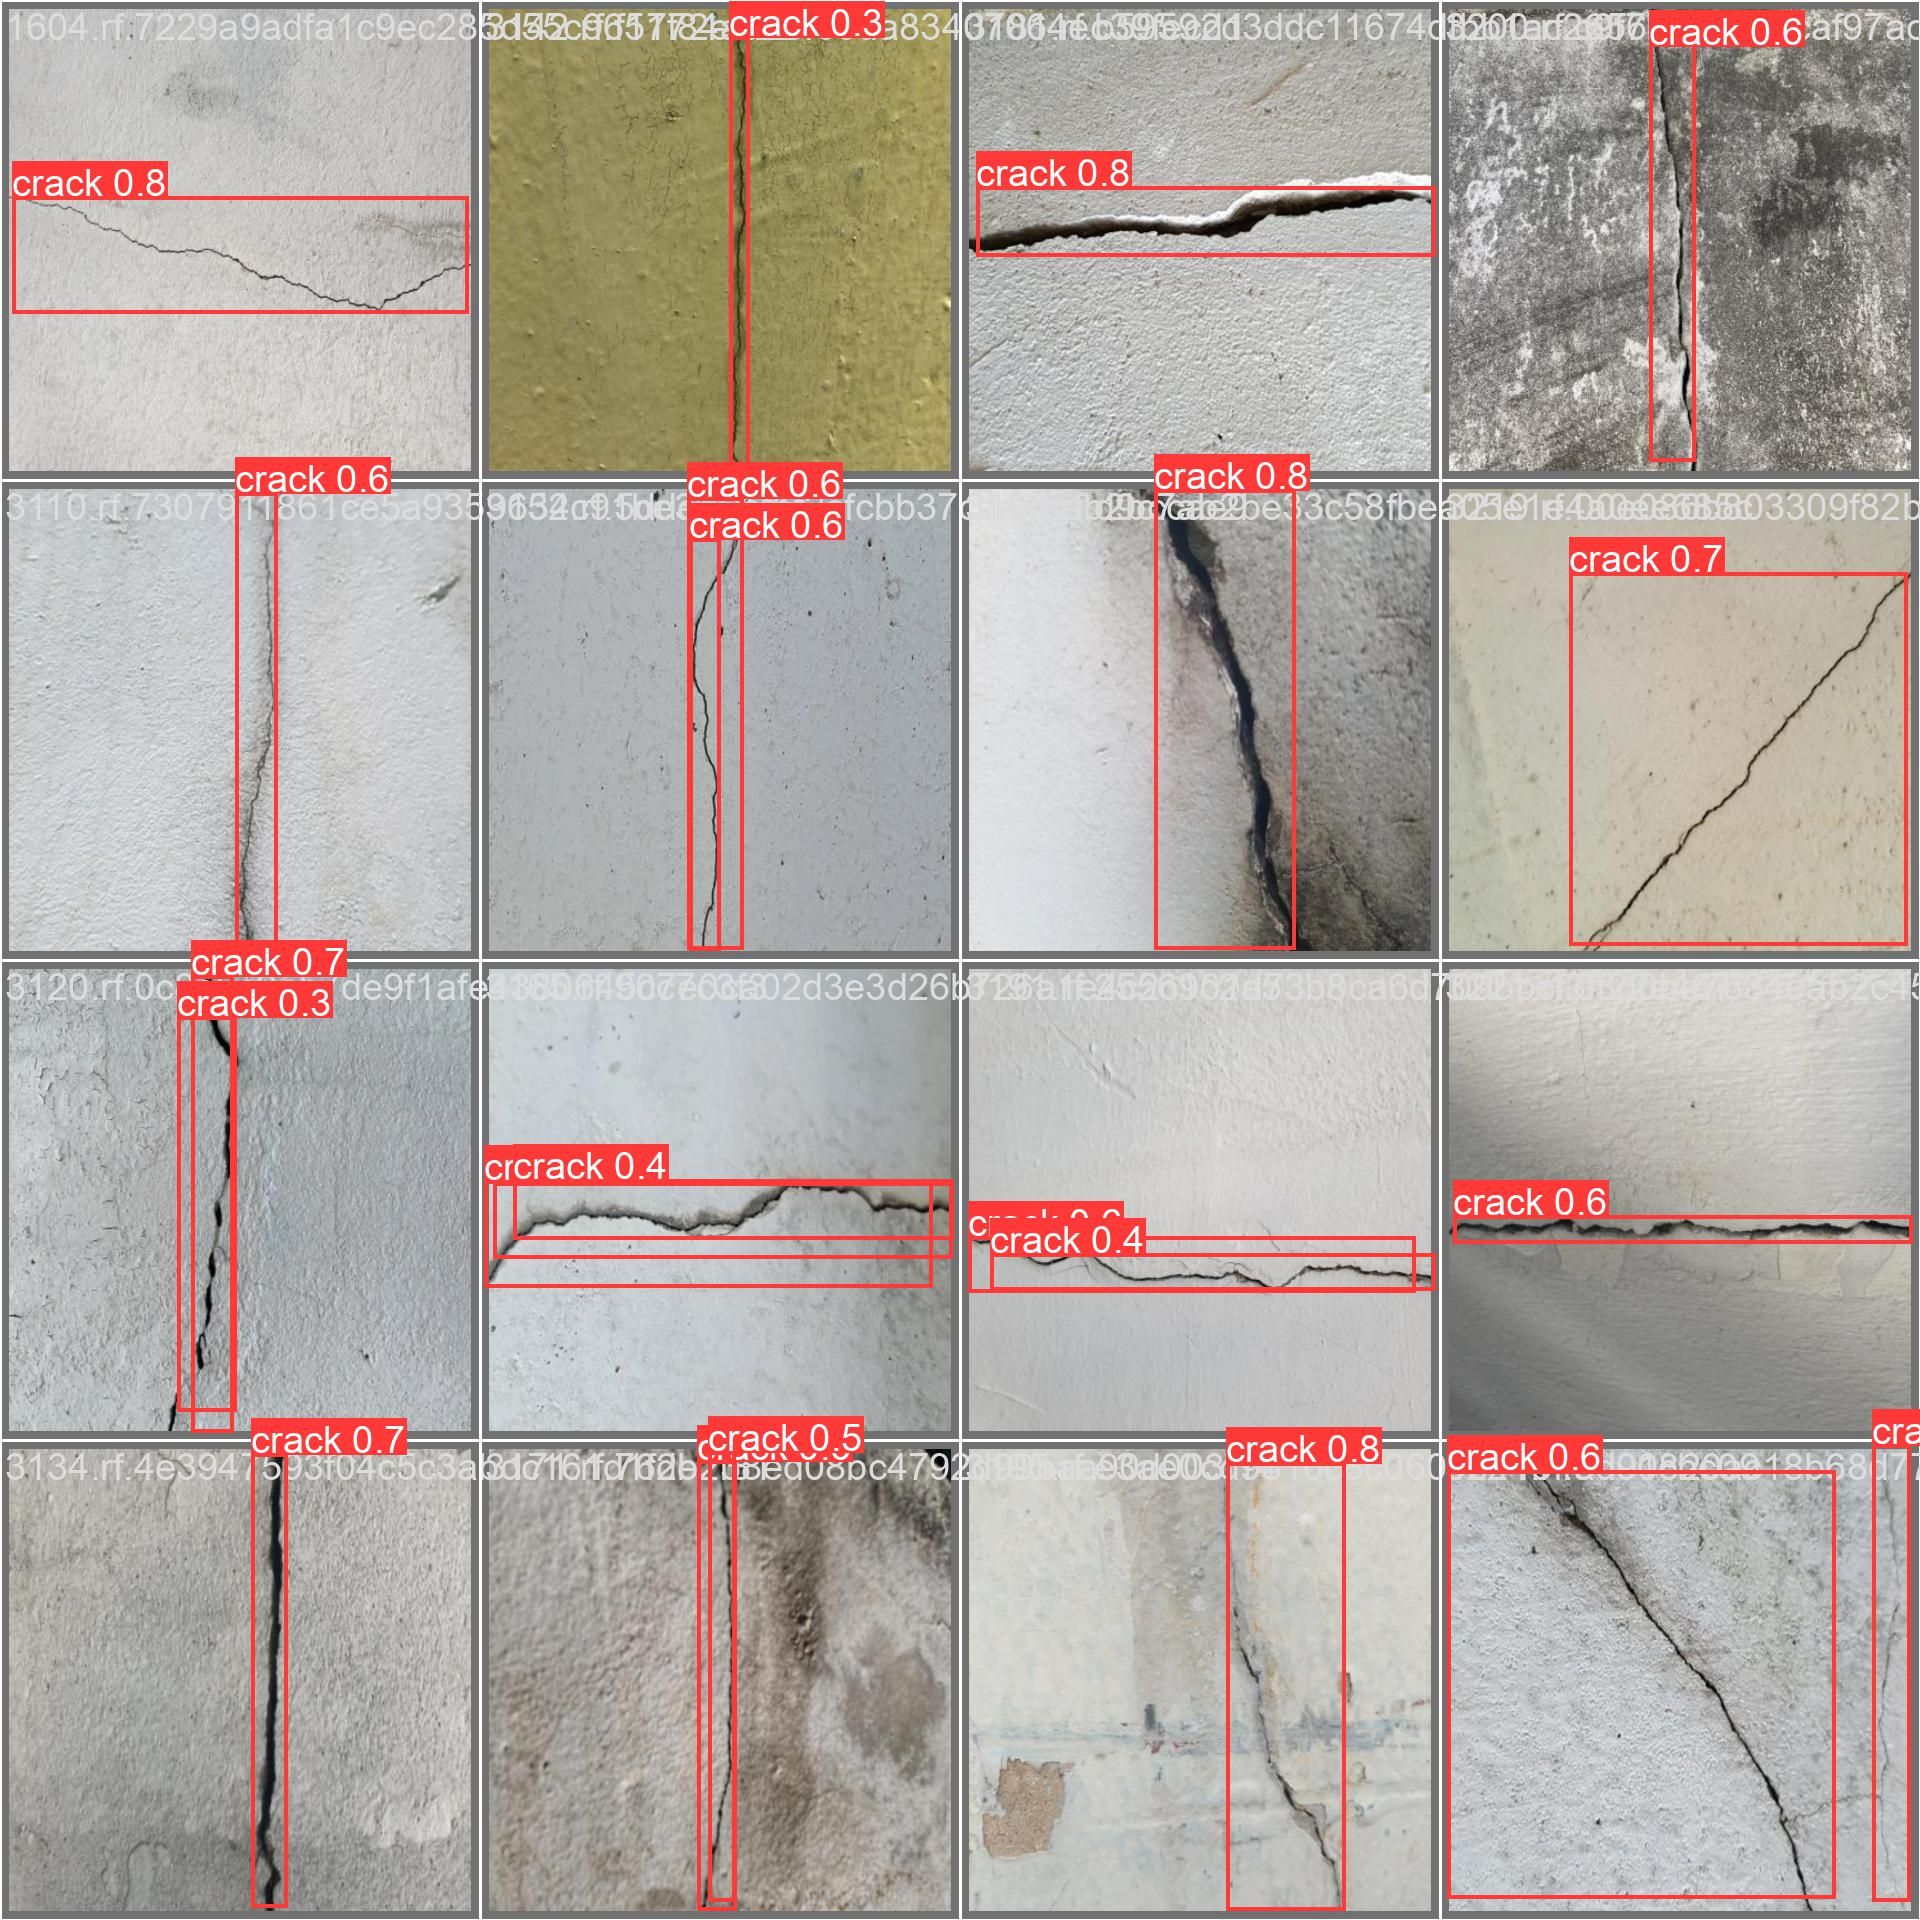

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [9]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/datasets/crack-2/valid/labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:08<00:00,  1.52it/s]
                   all        200        249      0.805      0.697      0.768       0.51
Speed: 5.7ms preprocess, 15.0ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/val


Inferência dos resultados do novo modelo. O arquivo binário `best.pt` contém o novo modelo treinado.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Olhando para um dos resultados da detecção de rachaduras do modelo.

In [26]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/runs/detect/predict/download.jpg save=True
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/runs/detect/predict/imagem-rachadura.jpg save=True


Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/1 /content/runs/detect/predict/download.jpg: 800x800 1 crack, 24.8ms
Speed: 4.6ms preprocess, 24.8ms inference, 2.5ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2
Ultralytics YOLOv8.0.110 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/1 /content/runs/detect/predict/imagem-rachadura.jpg: 544x800 2 cracks, 81.2ms
Speed: 3.7ms preprocess, 81.2ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict3


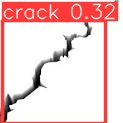

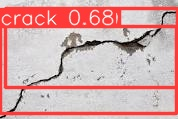

In [27]:
file1 = "/content/runs/detect/predict2/download.jpg"
file2 = "/content/runs/detect/predict3/imagem-rachadura.jpg"
display(Image(filename=file1, width=600))
display(Image(filename=file2, width=600))